# ETF comparision against Strategy HMC-SR

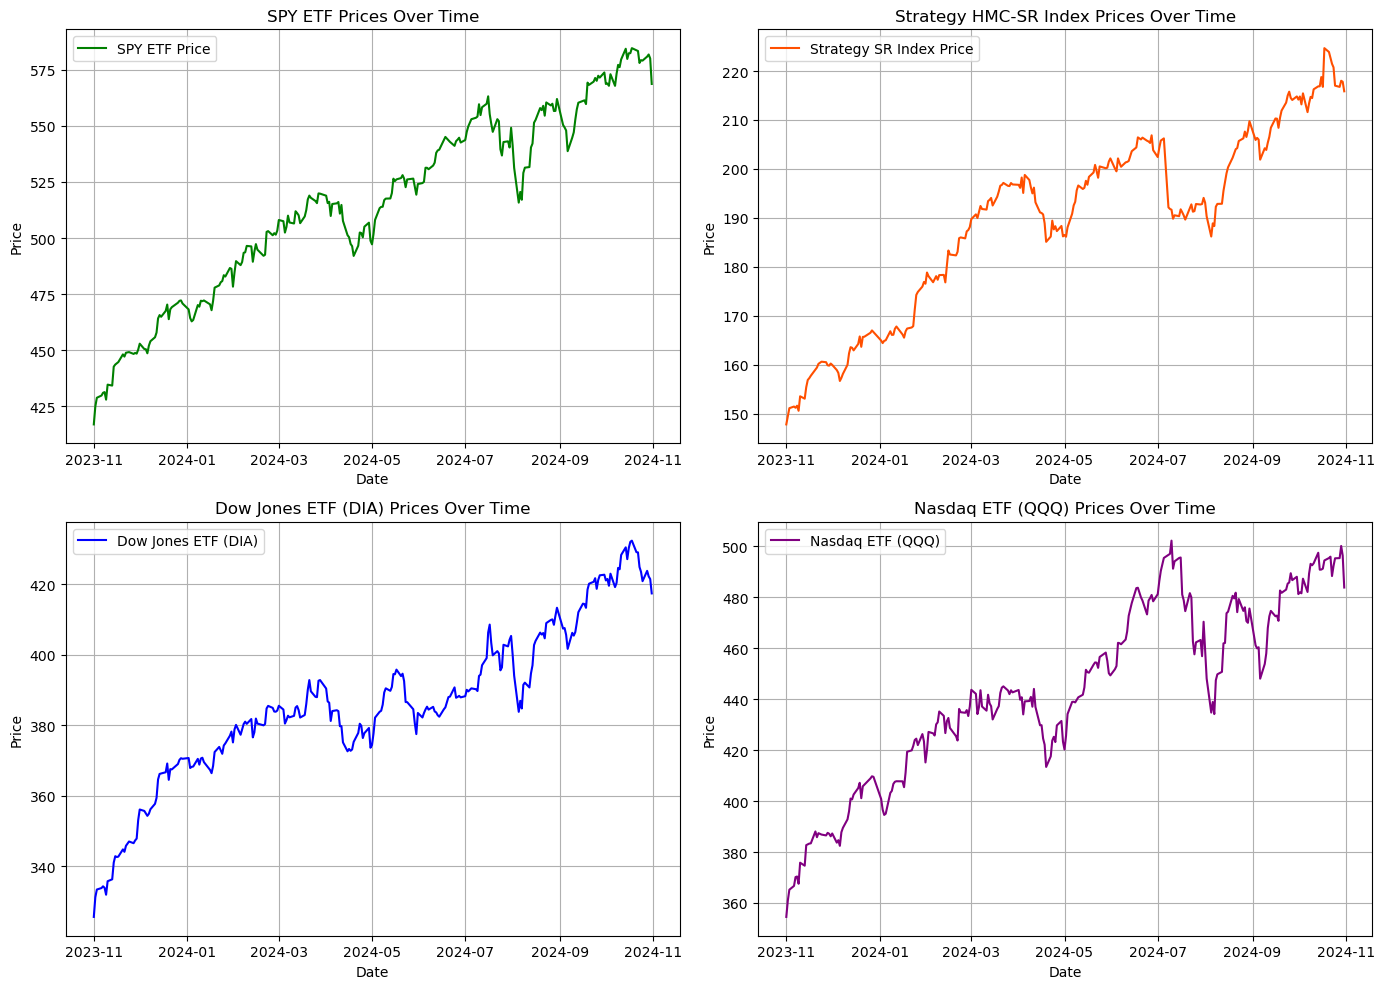

Yearly Returns from 2023-11-01 to 2024-11-01
SPY: 36.36%
DIA: 28.16%
QQQ: 36.48%
ETF-like Index: 46.00%


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Define the start and end dates
start_date = '2023-11-01'
end_date = '2024-11-01'

# List of semiconductor company tickers
tickers = ['CSCO',
'JPM',
'NFLX',
'SW',
'WMT',
'HCA',
'CTAS',
'WELL',
'WMB', 
'VST', 
'LIN',
'IEF']

# ETF tickers for Dow Jones (DIA) and Nasdaq (QQQ)
dow_ticker = 'DIA'
nasdaq_ticker = 'QQQ'
spy_ticker = 'SPY'

# Create an empty DataFrame to store data
index_data = pd.DataFrame()

# Fetch historical data for SPY
spy_data = yf.Ticker(spy_ticker).history(start=start_date, end=end_date)
index_data[spy_ticker] = spy_data['Close']

# Fetch historical data for Dow Jones (DIA) and Nasdaq (QQQ)
dow_data = yf.Ticker(dow_ticker).history(start=start_date, end=end_date)
index_data[dow_ticker] = dow_data['Close']

nasdaq_data = yf.Ticker(nasdaq_ticker).history(start=start_date, end=end_date)
index_data[nasdaq_ticker] = nasdaq_data['Close']

# Fetch historical data for each ticker in the list
for ticker in tickers:
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date, end=end_date)
    index_data[ticker] = stock_data['Close']

# Calculate the ETF-like index by averaging the stock prices
index_data['ETF-like Index'] = index_data[tickers].mean(axis=1)

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot SPY ETF Prices
axes[0, 0].plot(index_data.index, index_data[spy_ticker], label='SPY ETF Price', color='green')
axes[0, 0].set_title('SPY ETF Prices Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot Diversified ETF-like Index Prices
axes[0, 1].plot(index_data.index, index_data['ETF-like Index'], label='Strategy SR Index Price', color='#FF4F00')
axes[0, 1].set_title('Strategy HMC-SR Index Prices Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Dow Jones ETF (DIA) Prices
axes[1, 0].plot(index_data.index, index_data[dow_ticker], label='Dow Jones ETF (DIA)', color='blue')
axes[1, 0].set_title('Dow Jones ETF (DIA) Prices Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot Nasdaq ETF (QQQ) Prices
axes[1, 1].plot(index_data.index, index_data[nasdaq_ticker], label='Nasdaq ETF (QQQ)', color='purple')
axes[1, 1].set_title('Nasdaq ETF (QQQ) Prices Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Calculate yearly returns
yearly_returns = {}
for column in [spy_ticker, dow_ticker, nasdaq_ticker, 'ETF-like Index']:
    start_price = index_data[column].iloc[0]
    end_price = index_data[column].iloc[-1]
    yearly_returns[column] = ((end_price - start_price) / start_price) * 100

# Print yearly returns
print("Yearly Returns from", start_date, "to", end_date)
for key, value in yearly_returns.items():
    print(f"{key}: {value:.2f}%")
